# IMPORTING THE DATA

I downloaded the publicly available data directly from the Inside Airbnb website. It covers all Austin listing details, calendar details, review details and associated geolocation information collected on September 19th, 2019. The data was published in the form of multiple csv files.
<ul>
    <li>Listings.csv - Detailed listings data for Austin</li>
	<li>Calendar.csv - Detailed calendar data for listings in Austin</li>
	<li>Reviews.csv - Detailed reviews data for listings in Austin</li>
	<li>Neighbourhoods.geojson - GeoJSON file of neighbourhoods of the city</li>
</ul>
I will use Python to import the csv files into my Jupyter notebook to clean and explore the data. 

In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.api.types import is_string_dtype
import re
import seaborn as sns

# Read in the csv file
df = pd.read_csv('Data/listings.csv', low_memory=False)

# FEATURE SELECTION
Since there is no data dictionary available, I will familiarize myself with the columns to understand what each feature represents. This will help me to determine which columns I don't need and can remove, as to ensure that the data is used in the most productive and meaningful manner. 

I will inspect the shape of the data to determine how many columns and rows there are.

In [3]:
# Inspect the number of rows and columns
df.shape

(11339, 106)

There are 106 different columns in the listings csv file. I will inspect each and every column to determine which ones will be important for further processing, 20 columns at a time.

In [4]:
# Inspect the first 20 columns and first 5 rows
df.iloc[:5, :20]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id
0,2265,https://www.airbnb.com/rooms/2265,20190919050302,2019-09-19,Zen-East in the Heart of Austin (monthly rental),Zen East is situated in a vibrant & diverse mu...,This colorful and clean 1923 house was complet...,Zen East is situated in a vibrant & diverse mu...,none,NaN,A 2013 Genuine Buddy Scooter 125 may be availa...,5 min walk to Capitol Metro Rail (train that t...,"Several local restaurants, small clubs, music ...","Depending on your dates and arrival time, I am...",• Check-in time is 4 pm. Check out is 11 am. I...,NaN,NaN,https://a0.muscache.com/im/pictures/4740524/63...,NaN,2466
1,5245,https://www.airbnb.com/rooms/5245,20190919050302,2019-09-19,"Eco friendly, Colorful, Clean, Cozy monthly share",Situated in a vibrant & diverse multicultural ...,"This green, colorful, clean and cozy house was...",Situated in a vibrant & diverse multicultural ...,none,NaN,Please note: A two story studio was built in t...,NaN,NaN,"I should be available, upon your arrival, to a...",A brief profile for all guests along with phot...,NaN,NaN,https://a0.muscache.com/im/pictures/5167505/b3...,NaN,2466
2,5456,https://www.airbnb.com/rooms/5456,20190919050302,2019-09-19,"Walk to 6th, Rainey St and Convention Ctr",Fabulous location for walking to Convention Ce...,Cute Private Studio apartment located in Willo...,Fabulous location for walking to Convention Ce...,none,My neighborhood is ideally located if you want...,Parking on street requires a permit. There is...,"Bus stop around the block. Uber, Lyft, Ride, ...",Guests have access to patio.,I am happy to welcome my guests and show them in.,No Pets allowed. No smoking in the room. No m...,NaN,NaN,https://a0.muscache.com/im/pictures/14084884/b...,NaN,8028
3,5769,https://www.airbnb.com/rooms/5769,20190919050302,2019-09-19,NW Austin Room,NaN,Looking for a comfortable inexpensive room to ...,Looking for a comfortable inexpensive room to ...,none,Quiet neighborhood with lots of trees and good...,NaN,We are approximately 16 miles from downtown Au...,Gravel Parking Kitchen,We interact with our guests as little or as mu...,I will need to see identification at check in....,NaN,NaN,https://a0.muscache.com/im/pictures/23822033/a...,NaN,8186
4,6413,https://www.airbnb.com/rooms/6413,20190919050302,2019-09-19,Gem of a Studio near Downtown,"Great studio apartment, perfect for couples or...","(License #114332) Large, contemporary studio a...","Great studio apartment, perfect for couples or...",none,Travis Heights is one of the oldest neighborho...,Our calendar only extends a few months. If you...,"Parking for our place is on the street, roughl...",Private patio with lounge chairs and umbrella.,"You may see us during your stay, but you'll ma...",Posted prices include the 9% in local occupanc...,NaN,NaN,https://a0.muscache.com/im/pictures/349818/97e...,NaN,13879


<b>From the first 20 columns, the following will remain</b>
	<ul>
    <li>id - unique identifier that could be used to join other data files</li>
    </ul>

In [5]:
# Inspect the next 20 columns and first 5 rows
df.iloc[:5, 20:40]

,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed
0,https://www.airbnb.com/users/show/2466,Paddy,2008-08-23,"Austin, Texas, United States",I am a long time resident of Austin. I earned ...,within a few hours,100%,NaN,t,https://a0.muscache.com/im/users/2466/profile_...,https://a0.muscache.com/im/users/2466/profile_...,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702
1,https://www.airbnb.com/users/show/2466,Paddy,2008-08-23,"Austin, Texas, United States",I am a long time resident of Austin. I earned ...,within a few hours,100%,NaN,t,https://a0.muscache.com/im/users/2466/profile_...,https://a0.muscache.com/im/users/2466/profile_...,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702
2,https://www.airbnb.com/users/show/8028,Sylvia,2009-02-16,"Austin, Texas, United States",I am a licensed Real Estate Broker and owner o...,within an hour,100%,NaN,t,https://a0.muscache.com/im/users/8028/profile_...,https://a0.muscache.com/im/users/8028/profile_...,East Downtown,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702
3,https://www.airbnb.com/users/show/8186,Elizabeth,2009-02-19,"Austin, Texas, United States",We're easygoing professionals that enjoy meeti...,within an hour,100%,NaN,t,https://a0.muscache.com/im/users/8186/profile_...,https://a0.muscache.com/im/users/8186/profile_...,SW Williamson Co.,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Austin, TX, United States",SW Williamson Co.,78729
4,https://www.airbnb.com/users/show/13879,Todd,2009-04-17,"Austin, Texas, United States","We're a young family that likes to travel, we ...",within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/4f35ef11-7...,https://a0.muscache.com/im/pictures/4f35ef11-7...,Travis Heights,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Austin, TX, United States",Travis Heights,78704


<b>From the next 20 columns, the following will remain</b>
	<ul>
    <li>neighbourhood_cleansed - zip code of the neighbourhood the listing is in</li>
    </ul>

In [6]:
# Inspect the next 20 columns and first 5 rows
df.iloc[:5, 40:60]

,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet
0,NaN,Austin,TX,78702,Austin,"Austin, TX",US,United States,30.27750,-97.71398,f,House,Entire home/apt,4,2.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN
1,NaN,Austin,TX,78702,Austin,"Austin, TX",US,United States,30.27577,-97.71379,t,House,Private room,2,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN
2,NaN,Austin,TX,78702,Austin,"Austin, TX",US,United States,30.26112,-97.73448,t,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets live...",NaN
3,NaN,Austin,TX,78729,Austin,"Austin, TX",US,United States,30.45596,-97.78370,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN
4,NaN,Austin,TX,78704,Austin,"Austin, TX",US,United States,30.24829,-97.73726,t,Guesthouse,Entire home/apt,2,1.0,NaN,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",550.0


<b>From the next 20 columns, the following will remain</b>
	<ul>
    <li>latitude - measurement location north or south of the equator</li>
    <li>longitude - measurement location east or west of the Prime Meridian </li>
    <li>room_type - type of listing space, ie. entire home or room</li>
    <li>accommodates - number of allowed guests</li>
    <li>bathrooms - number of bathrooms</li>
    <li>bedrooms - number of bedrooms</li>
    <li>beds - number of beds</li>
    </ul>

In [7]:
# Inspect the next 20 columns and first 5 rows
df.iloc[:5, 60:80]

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90
0,$225.00,NaN,NaN,$500.00,$100.00,4,$30.00,30,90,30,30,90,90,30.0,90.0,6 weeks ago,t,0,0,0
1,$100.00,NaN,NaN,$500.00,$75.00,2,$35.00,30,60,30,30,60,60,30.0,60.0,3 months ago,t,11,11,11
2,$95.00,NaN,NaN,$100.00,NaN,2,$45.00,2,90,2,2,90,90,2.0,90.0,2 weeks ago,t,2,11,35
3,$40.00,$160.00,NaN,NaN,NaN,2,$0.00,1,14,1,1,14,14,1.0,14.0,3 days ago,t,6,6,13
4,$99.00,$700.00,"$1,900.00",NaN,$50.00,2,$25.00,3,365,3,4,365,365,3.0,365.0,1 week ago,t,0,0,0


<b>From the next 20 columns, the following will remain</b>
	<ul>
    <li>price - average price per night</li>
    <li>minimum_nights - minimum amount of nights to book</li>
    </ul>

In [8]:
# Inspect the next 20 columns and first 5 rows
df.iloc[:5, 80:100]

,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture
0,0,2019-09-19,24,1,2009-03-17,2019-03-16,93.0,9.0,10.0,10.0,10.0,8.0,9.0,f,NaN,"{""Texas State""}",f,f,strict_14_with_grace_period,f
1,11,2019-09-19,9,0,2009-03-19,2018-03-14,91.0,10.0,8.0,10.0,9.0,10.0,9.0,f,NaN,"{""Texas State""}",f,f,strict_14_with_grace_period,f
2,291,2019-09-19,499,46,2009-03-08,2019-09-14,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""Texas State""}",f,f,strict_14_with_grace_period,f
3,13,2019-09-19,253,16,2010-04-10,2019-08-22,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""Texas State""}",f,f,moderate,t
4,0,2019-09-19,100,23,2009-12-14,2019-08-25,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,32041657928,"{""Texas State""}",t,f,strict_14_with_grace_period,f


<b>From the next 20 columns, the following will remain</b>
	<ul>
    <li>number_of_reviews - number of reviews</li>
    <li>review_scores_rating - the rating score determined by reviews</li>
    </ul>

In [9]:
df.iloc[:5, 100:]

,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,f,3,2,1,0,0.19
1,f,3,2,1,0,0.07
2,t,1,1,0,0,3.89
3,t,1,0,1,0,2.20
4,f,1,1,0,0,0.84


<b>No columns will remain from the last set of columns.</b>

I will extract only the columns of interest, store them in a new dataframe and ensure all of the columns are there.

In [10]:
# Create new dataframe with important columns and inspect it
df = df[['id', 'neighbourhood_cleansed', 'latitude', 'longitude', 
            'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
            'price', 'minimum_nights', 'number_of_reviews', 
            'review_scores_rating']]

# Rename the id column to listing_id
df.rename(columns = {'id':'listing_id'}, inplace = True)

# Set index to the listing id
new_df = df.set_index('listing_id')

new_df.head(5)

,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating
listing_id,,,,,,,,,,,,
2265,78702,30.27750,-97.71398,Entire home/apt,4,2.0,2.0,2.0,$225.00,30,24,93.0
5245,78702,30.27577,-97.71379,Private room,2,1.0,1.0,2.0,$100.00,30,9,91.0
5456,78702,30.26112,-97.73448,Entire home/apt,3,1.0,1.0,2.0,$95.00,2,499,96.0
5769,78729,30.45596,-97.78370,Private room,2,1.0,1.0,1.0,$40.00,1,253,98.0
6413,78704,30.24829,-97.73726,Entire home/apt,2,1.0,NaN,1.0,$99.00,3,100,99.0


For my exploratory analysis later, I will need some information related to amount of calendar bookings per listing from the past year. I will put these values into a new column. Then I will merge the dataframe with the main dataframe.

In [11]:
# Read in detailed calendar data 
df_calendar = pd.read_csv('Data/calendar.csv')

# Get subset of calendar data where the listing was not available, ie., booked
df_calendar  = df_calendar[df_calendar['available'] == 'f']

# Get amount of bookings this year per listing 
df_calendar = df_calendar.groupby('listing_id').size().to_frame()

# Change column name to something more sensible
df_calendar.columns = ['number_of_bookings']

# Inspect the calendar dataframe
df_calendar.head()

,number_of_bookings
listing_id,
2265,365
5245,354
5456,74
5769,352
6413,365


In [12]:
# Merge the calendar data with the main dataframe
new_df = pd.merge(left=new_df, right=df_calendar, how='left', left_on='listing_id', right_on='listing_id')

# Check if there are any missing values
new_df['number_of_bookings'].isnull().value_counts()

False    11016
True       323
Name: number_of_bookings, dtype: int64

There are 323 missing number_of_bookings values. This is likely because these particular listings do not have any bookings yet. I will set the number_of_bookings of them to zero

In [13]:
# For the missing values in number_of_bookings column due to no bookings yet, set to zero
new_df['number_of_bookings'] = new_df['number_of_bookings'].fillna(0)

# Check if there are any more missing values
new_df['number_of_bookings'].isnull().value_counts()

False    11339
Name: number_of_bookings, dtype: int64

There are no more missing values in the number_of_bookings column. 

In [14]:
# Inspect the updated dataframe
new_df.info()
new_df.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11339 entries, 2265 to 38732317
Data columns (total 13 columns):
neighbourhood_cleansed    11339 non-null int64
latitude                  11339 non-null float64
longitude                 11339 non-null float64
room_type                 11339 non-null object
accommodates              11339 non-null int64
bathrooms                 11321 non-null float64
bedrooms                  11332 non-null float64
beds                      11328 non-null float64
price                     11339 non-null object
minimum_nights            11339 non-null int64
number_of_reviews         11339 non-null int64
review_scores_rating      8759 non-null float64
number_of_bookings        11339 non-null float64
dtypes: float64(7), int64(4), object(2)
memory usage: 1.2+ MB


,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,number_of_bookings
listing_id,,,,,,,,,,,,,
38726612,78746,30.25875,-97.78971,Entire home/apt,8,2.0,2.0,4.0,$400.00,2,0,NaN,291.0
38727516,78745,30.19054,-97.77535,Entire home/apt,2,1.0,1.0,1.0,$55.00,1,1,NaN,6.0
38728146,78744,30.18790,-97.76552,Private room,2,1.0,1.0,1.0,$50.00,1,0,NaN,354.0
38728874,78704,30.25580,-97.76815,Entire home/apt,2,1.0,1.0,1.0,$455.00,2,0,NaN,354.0
38732317,78735,30.25454,-97.83561,Private room,2,1.0,1.0,1.0,$43.00,1,0,NaN,2.0


Now I will drop any duplicates.

In [15]:
# Drop any duplicates in the data
new_df.drop_duplicates()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11339 entries, 2265 to 38732317
Data columns (total 13 columns):
neighbourhood_cleansed    11339 non-null int64
latitude                  11339 non-null float64
longitude                 11339 non-null float64
room_type                 11339 non-null object
accommodates              11339 non-null int64
bathrooms                 11321 non-null float64
bedrooms                  11332 non-null float64
beds                      11328 non-null float64
price                     11339 non-null object
minimum_nights            11339 non-null int64
number_of_reviews         11339 non-null int64
review_scores_rating      8759 non-null float64
number_of_bookings        11339 non-null float64
dtypes: float64(7), int64(4), object(2)
memory usage: 1.2+ MB


The numbers haven't changed so there were no duplicates rows.

In general, the cleaning and preparation also involves fixing structural issues, handling missing data and managing outliers. These processes will be explained in more detail.

# CLEANING THE DATA
First I will inspect the new dataframe on it's data types.

In [16]:
# Check for data types and missing values
new_df.info(verbose = True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11339 entries, 2265 to 38732317
Data columns (total 13 columns):
neighbourhood_cleansed    11339 non-null int64
latitude                  11339 non-null float64
longitude                 11339 non-null float64
room_type                 11339 non-null object
accommodates              11339 non-null int64
bathrooms                 11321 non-null float64
bedrooms                  11332 non-null float64
beds                      11328 non-null float64
price                     11339 non-null object
minimum_nights            11339 non-null int64
number_of_reviews         11339 non-null int64
review_scores_rating      8759 non-null float64
number_of_bookings        11339 non-null float64
dtypes: float64(7), int64(4), object(2)
memory usage: 1.2+ MB


<b>Upon observation, I will do the following</b>
<ul>
    <li>update price object type to float type</li>
     <li>update room_type object type to categorical type</li>
    <li>handle missing values in bathrooms, bedrooms, beds and review_scores_rating </li>
</ul>

The price column contains the $ symbol so it may be a string. I will check to see if it is of string data type. If so, I will need to convert the column to a float. This will make help with aggregations and visualizations later in the process.

In [17]:
# Check if the 'price' Series is of string type
is_string_dtype(new_df['price'])

True

In [18]:
# Remove all $ and , symbols from the 'price' Series and convert the values from string to float type
new_df.loc[:,'price'] = new_df.loc[:,'price'].str.replace('[,$]', '', regex=True).astype(float)

# Check the updated data type
new_df['price'].dtype

dtype('float64')

I will convert property_type and room_type object to either categorical.



In [19]:
# Select columns to be of categorical type
new_df['room_type'] = new_df['room_type'].astype('category')
new_df['room_type'].dtypes

CategoricalDtype(categories=['Entire home/apt', 'Hotel room', 'Private room',
                  'Shared room'],
                 ordered=False)

Since the review_scores_rating column has more than 20% missing values, I will inspect the data related to reviews further to determine how I should handle it. More specifically, I will take a look at the rows which have a missing review_scores_rating value.

In [20]:
# Get subset of dataframe that is related to reviews 
reviews = new_df[['number_of_reviews', 'review_scores_rating']]

# Get subset of reviews that has a missing review score
reviews_nan = reviews[pd.isnull(reviews['review_scores_rating'])]
reviews_nan.head(10)

,number_of_reviews,review_scores_rating
listing_id,,
53639,0,NaN
77347,0,NaN
228217,0,NaN
269200,0,NaN
314152,0,NaN
318963,1,NaN
321069,1,NaN
331549,0,NaN
333114,0,NaN


As suspected, there are several rows with 0 number_of_reviews, therefore the reviews_scores_rating cannot be calculated. I will flag these with a -1. 

In [21]:
# Loop through the data frame, update review_scores_rating to -1 if the number_of_reviews is 0 
for i, row in new_df.iterrows():
    if row['number_of_reviews'] == 0:
       new_df.loc[i, 'review_scores_rating'] = -1

new_df[['number_of_reviews', 'review_scores_rating']].tail(10)

,number_of_reviews,review_scores_rating
listing_id,,
38718339,0,-1.0
38720405,0,-1.0
38723815,0,-1.0
38724103,0,-1.0
38725935,0,-1.0
38726612,0,-1.0
38727516,1,NaN
38728146,0,-1.0
38728874,0,-1.0


Interestingly, there are some rows with more than 0 number_of_reviews still resulting in missing values. I will inspect this further by looking at the rows with numbers_of_reviews > 0 and reviews_score_rating = 0.

In [22]:
# Get subset of previous reviews subset that have more than 0 number of reviews
reviews_nan_notzero = reviews_nan[reviews_nan['number_of_reviews'] > 0]

# Get the count of how many records have more than 0 number of reviews and missing review scores
print(reviews_nan_notzero.count())
reviews_nan_notzero.head(5)

number_of_reviews       120
review_scores_rating      0
dtype: int64


,number_of_reviews,review_scores_rating
listing_id,,
318963,1,NaN
321069,1,NaN
942843,1,NaN
2385724,2,NaN
4356661,1,NaN


I will pull in the detailed reviews data for further analysis and inspect the first 5 records.

In [23]:
# Pull in the detailed reviews data into a data frame
df_reviews = pd.read_csv('Data/reviews.csv')
df_reviews.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2265,963,2009-03-17,7538,Niall,I stayed here during SXSW and had a really ple...
1,2265,1057,2009-03-22,10029,Michael,"Great place, close enough to everything downto..."
2,2265,200418,2011-03-16,61677,Gustaf,We had a great time in Austin staying at Paddy...
3,2265,1001630,2012-03-15,1523753,Noah,We had a great stay at Zen East for South By S...
4,2265,1016390,2012-03-19,1547660,Melissa,I arrived late in the evening so did not meet ...


In [24]:
# Set index as the listing id and get a subset of the important columns
df_reviews = df_reviews.set_index('listing_id')
df_reviews = df_reviews[['date', 'comments']]
df_reviews.head(5)

,date,comments
listing_id,,
2265,2009-03-17,I stayed here during SXSW and had a really ple...
2265,2009-03-22,"Great place, close enough to everything downto..."
2265,2011-03-16,We had a great time in Austin staying at Paddy...
2265,2012-03-15,We had a great stay at Zen East for South By S...
2265,2012-03-19,I arrived late in the evening so did not meet ...


<b>I will combine the following two dataframes for further inspection</b>
<ul>
    <li>df_reviews - subset of detailed reviews data containing the date and comments for each listing_id</li>
    <li>reviews_nan_notzero - subset of detailed listings data containing listing id where number of reviews > 0
    and review scores are missing</li>
</ul>

In [25]:
# Combine the 2 relevant dataframes
nan_df_review = pd.concat([df_reviews, reviews_nan_notzero], axis=1)

# Expand the cell to allow more characters
pd.set_option('max_colwidth', 100)

# Subset the records that have more than 0 number of reviews
nan_df_review = nan_df_review[nan_df_review['number_of_reviews'] > 0]
nan_df_review

,date,comments,number_of_reviews,review_scores_rating
listing_id,,,,
318963,2012-01-26,The host canceled my reservation 45 days before arrival.,1.0,NaN
321069,2018-06-23,The host canceled this reservation 104 days before arrival. This is an automated posting.,1.0,NaN
942843,2013-07-31,The reservation was canceled 7 days before arrival. This is an automated posting.,1.0,NaN
2385724,2016-09-26,The host canceled this reservation 32 days before arrival. This is an automated posting.,2.0,NaN
2385724,2016-11-20,The host canceled this reservation 33 days before arrival. This is an automated posting.,2.0,NaN
...,...,...,...,...
38297689,2019-09-08,The host canceled this reservation 20 days before arrival. This is an automated posting.,1.0,NaN
38596517,2019-09-13,The host canceled this reservation 21 days before arrival. This is an automated posting.,1.0,NaN
38646013,2019-09-17,The host canceled this reservation 44 days before arrival. This is an automated posting.,1.0,NaN


141 rows returned. If the listing has more than 0 number_of_reviews and has a missing review_scores_rating, there is a commonality of an automated review comment due to a cancelled reservation. 

There is for sure at least one comment that says it was canceled but there was no automated text. I suspect that there was an update to the system after this post was created. I will loop through the nan_df_review dataframe and check each record for either the automated text comment or host cancellation comment. If there's a match, I will keep track of the listing id in a new dataframe.

In [26]:
# Create an empty dataframe with column listing_id
listings_df = pd.DataFrame(columns=['listing_id'])

# Reset the index 
nan_df_review = nan_df_review.reset_index()

# Loop through the nan_df_review dataframe and find which records have the automated posting text or 
# host cancellation text. If the record comment matches, add the listing_id of that review to the 
# listings_df dataframe
for i, review in nan_df_review.iterrows():
    if bool(re.findall(r"\bautomated posting\b|\bhost canceled\b", review['comments'])) == True:
        listings_df.loc[i] = review['listing_id']

# Inspect the listings_df dataframe
listings_df.head(10)

,listing_id
0,318963
1,321069
2,942843
3,2385724
4,2385724
5,4356661
6,5593402
7,5631123
8,7492335
9,8383427


I will drop any duplicates in the listings_df dataframe.

In [27]:
listings_df.drop_duplicates()

,listing_id
0,318963
1,321069
2,942843
3,2385724
5,4356661
...,...
136,38297689
137,38596517
138,38646013
139,38703706


After dropping duplicates, 120 listings remain. 

Now I will loop through the main dataframe and match the listings from listings_df. For each matching record, I will flag the review_scores_rating value with -1.

In [28]:
# Reset the index
new_df = new_df.reset_index()

# Loop through the main dataframe to impute the review_scores_rating to -1 if the 
# listing_id matches 
for i, row_df_review in new_df.iterrows():
    for x, row_listing_id in listings_df.iterrows():
        if row_df_review['listing_id'] == row_listing_id['listing_id']:
            new_df.loc[i, 'review_scores_rating'] = -1

# Check if the -1 values were imputed           
check_df = new_df[new_df['review_scores_rating'] == -1]
check_df.head()

,listing_id,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,number_of_bookings
25,53639,78705,30.29277,-97.72449,Entire home/apt,2,NaN,1.0,1.0,90.0,3,0,-1.0,26.0
50,77347,78733,30.33937,-97.88116,Private room,2,1.0,1.0,1.0,95.0,2,0,-1.0,0.0
107,228217,78728,30.45831,-97.68722,Entire home/apt,7,2.5,3.0,3.0,350.0,4,0,-1.0,0.0
118,269200,78753,30.38342,-97.66611,Private room,7,2.0,1.0,2.0,550.0,4,0,-1.0,0.0
132,314152,78730,30.35672,-97.79621,Entire home/apt,4,NaN,2.0,NaN,350.0,4,0,-1.0,365.0


I will check to see if there are any more missing review_scores_rating values in the main dataframe.

In [29]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11339 entries, 0 to 11338
Data columns (total 14 columns):
listing_id                11339 non-null int64
neighbourhood_cleansed    11339 non-null int64
latitude                  11339 non-null float64
longitude                 11339 non-null float64
room_type                 11339 non-null category
accommodates              11339 non-null int64
bathrooms                 11321 non-null float64
bedrooms                  11332 non-null float64
beds                      11328 non-null float64
price                     11339 non-null float64
minimum_nights            11339 non-null int64
number_of_reviews         11339 non-null int64
review_scores_rating      11339 non-null float64
number_of_bookings        11339 non-null float64
dtypes: category(1), float64(8), int64(5)
memory usage: 1.1 MB


There are no more missing values in the review_scores_rating column. Now I will proceed on handling the missing bathrooms, bedrooms and beds values.

For missing bathrooms, bedrooms and beds I will create a function that will impute the median of the feature based on a correlated feature. For example, in the case of missing bathrooms value, if the record has a one bedroom, I will impute the median number of bathrooms for all one bedroom listings. 

In [30]:
# Define function for imputing the mean based on the missing feature value and correlated feature
def impute_median(df, impute_median, corr):
    for i, record in df.iterrows():
        median = int(new_df[new_df[corr] == record[corr]][impute_median].median())
        new_df.loc[i, impute_median] = median

Check the distribution before imputing the median for bathrooms. I will ensure the imputation does not drastically impact the distribution. If it doesn't, impute the median value. 

In [31]:
new_df['bathrooms'].describe()

count    11321.000000
mean         1.550062
std          0.891723
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         17.000000
Name: bathrooms, dtype: float64

Impute the median number of bathrooms based on correlated number of bedrooms using the impute_median function.

In [32]:
# Get subset of dataaframe where there is missing bathrooms data
nan_bathroom = new_df[pd.isnull(new_df['bathrooms'])]

# Call function to impute the mean
impute_median(df=nan_bathroom, impute_median='bathrooms', corr='bedrooms')

Check the distribution of bathrooms.

In [33]:
new_df['bathrooms'].describe()

count    11339.000000
mean         1.550071
std          0.892224
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         17.000000
Name: bathrooms, dtype: float64

The distribution hasn't changed. Check the distribution before imputing the median for bedrooms. I will ensure the imputation does not drastically impact the distribution. If it doesn't, impute the median value.

In [34]:
new_df['bedrooms'].describe()

count    11332.000000
mean         1.787857
std          1.268618
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         23.000000
Name: bedrooms, dtype: float64

Impute the median number of bedrooms based on correlated number of bathrooms using the impute_median function.

In [35]:
# Get subset of dataaframe where there is missing bedrooms data
nan_bedrooms = new_df[pd.isnull(new_df['bedrooms'])]

# Call function to impute the mean
impute_median(df=nan_bedrooms, impute_median='bedrooms', corr='bathrooms')  

Check the distribution of bedrooms.

In [36]:
new_df['bedrooms'].describe()

count    11339.000000
mean         1.787371
std          1.268377
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         23.000000
Name: bedrooms, dtype: float64

The distribution hasn't changed much. Check the distribution before imputing the median for beds. I will ensure the imputation does not drastically impact the distribution. If it doesn't, impute the median value.

In [37]:
new_df['beds'].describe()

count    11328.000000
mean         2.556321
std          2.787872
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        132.000000
Name: beds, dtype: float64

Impute the median number of bed based on correlated number of accommodates using the impute_median function.

In [38]:
# Get subset of dataaframe where there is missing beds data
nan_beds = new_df[pd.isnull(new_df['beds'])]

# Call function to impute the mean
impute_median(df=nan_beds, impute_median='beds', corr='accommodates')   

Check the distribution of bedrooms.

In [39]:
new_df['beds'].describe()

count    11339.000000
mean         2.556663
std          2.787885
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        132.000000
Name: beds, dtype: float64

The distribution hasn't changed much.

Inspect that all data types are correct and there is no more missing data.

In [40]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11339 entries, 0 to 11338
Data columns (total 14 columns):
listing_id                11339 non-null int64
neighbourhood_cleansed    11339 non-null int64
latitude                  11339 non-null float64
longitude                 11339 non-null float64
room_type                 11339 non-null category
accommodates              11339 non-null int64
bathrooms                 11339 non-null float64
bedrooms                  11339 non-null float64
beds                      11339 non-null float64
price                     11339 non-null float64
minimum_nights            11339 non-null int64
number_of_reviews         11339 non-null int64
review_scores_rating      11339 non-null float64
number_of_bookings        11339 non-null float64
dtypes: category(1), float64(8), int64(5)
memory usage: 1.1 MB


Now that all bathrooms to bedrooms have no missing values, I will use these two columns to calculate the bathroom to bedroom ratio for each listing. This feature will help with exploratory data analysis later. For the listings that have 0 bathrooms and 0 bedrooms, I will set the bedroom_bath_ratio value to 0. For the listings that have 1 or more bathrooms and 0 bedrooms, I will flag the bedroom_bath_ratio value to -1.

In [41]:
# Calculate the bathroom to bedroom ratio
new_df['bedroom_bath_ratio'] = (new_df['bathrooms'] / new_df['bedrooms']) * 100

# For records that have 0 bathrooms and 0 bedrooms, set bedroom_bath_ratio to 0. If bathrooms is more than 0 
# and bedrooms is 0, flag these values with -1.
for i, record in new_df.iterrows():
    if record['bathrooms'] == 0.0 and record['bedrooms'] == 0.0:
        new_df.loc[i, 'bedroom_bath_ratio'] = 0.0
    if record['bathrooms'] > 0 and record['bedrooms'] == 0.0:
        new_df.loc[i, 'bedroom_bath_ratio'] = -1

# Inspect the dataframe
new_df.head(20)

,listing_id,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,number_of_bookings,bedroom_bath_ratio
0,2265,78702,30.27750,-97.71398,Entire home/apt,4,2.0,2.0,2.0,225.0,30,24,93.0,365.0,100.000000
1,5245,78702,30.27577,-97.71379,Private room,2,1.0,1.0,2.0,100.0,30,9,91.0,354.0,100.000000
2,5456,78702,30.26112,-97.73448,Entire home/apt,3,1.0,1.0,2.0,95.0,2,499,96.0,74.0,100.000000
3,5769,78729,30.45596,-97.78370,Private room,2,1.0,1.0,1.0,40.0,1,253,98.0,352.0,100.000000
4,6413,78704,30.24829,-97.73726,Entire home/apt,2,1.0,1.0,1.0,99.0,3,100,99.0,365.0,100.000000
5,6448,78704,30.26027,-97.76503,Entire home/apt,3,1.0,1.0,2.0,129.0,3,214,99.0,204.0,100.000000
6,8502,78741,30.23616,-97.73682,Entire home/apt,2,1.0,1.0,1.0,40.0,3,46,92.0,206.0,100.000000
7,14765,78704,30.25012,-97.74193,Entire home/apt,5,2.0,2.0,4.0,260.0,2,47,94.0,225.0,100.000000
8,14913,78748,30.15645,-97.82411,Entire home/apt,6,2.0,3.0,3.0,300.0,1,25,98.0,11.0,66.666667
9,21126,78704,30.24503,-97.74075,Entire home/apt,5,1.0,2.0,2.0,550.0,1,89,98.0,240.0,50.000000


In [42]:
# Check if there are any missing values in bedroom_bath_ratio
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11339 entries, 0 to 11338
Data columns (total 15 columns):
listing_id                11339 non-null int64
neighbourhood_cleansed    11339 non-null int64
latitude                  11339 non-null float64
longitude                 11339 non-null float64
room_type                 11339 non-null category
accommodates              11339 non-null int64
bathrooms                 11339 non-null float64
bedrooms                  11339 non-null float64
beds                      11339 non-null float64
price                     11339 non-null float64
minimum_nights            11339 non-null int64
number_of_reviews         11339 non-null int64
review_scores_rating      11339 non-null float64
number_of_bookings        11339 non-null float64
bedroom_bath_ratio        11339 non-null float64
dtypes: category(1), float64(9), int64(5)
memory usage: 1.2 MB


There are no more missing values so I will proceed to handling any outliers.

# HANDLING OUTLIERS

In [43]:
# View the basic statistical details of specific columns of the dataframe
new_df[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'number_of_reviews',
        'review_scores_rating', 'number_of_bookings']].describe(percentiles=[.01, .1, .25, .5, .75, .9, .99])

,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,number_of_bookings
count,11339.000000,11339.000000,11339.000000,11339.000000,11339.00000,11339.000000,11339.000000,11339.000000,11339.000000
mean,4.710821,1.550071,1.787371,2.556663,390.70112,5.082988,29.006262,74.100626,233.398360
std,3.258878,0.892224,1.268377,2.787885,1128.82863,20.223087,58.114834,41.192930,135.097541
min,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,-1.000000,0.000000
1%,1.000000,1.000000,0.000000,1.000000,23.00000,1.000000,0.000000,-1.000000,0.000000
10%,2.000000,1.000000,1.000000,1.000000,50.00000,1.000000,0.000000,-1.000000,21.000000
25%,2.000000,1.000000,1.000000,1.000000,80.00000,1.000000,1.000000,80.000000,95.000000
50%,4.000000,1.000000,1.000000,2.000000,145.00000,2.000000,6.000000,97.000000,283.000000
75%,6.000000,2.000000,2.000000,3.000000,300.00000,2.000000,29.000000,100.000000,365.000000
90%,8.200000,2.500000,3.000000,5.000000,669.00000,5.000000,85.000000,100.000000,365.000000


From a rough inspection of the summary statistics, I can see a number of variables that seem to contain outliers. I will analyze the outliers that I'm unsure about further through data visualizations, starting first with number of accommodates and work my way down the list of features that contain outliers.

Text(0.5, 0, 'price')

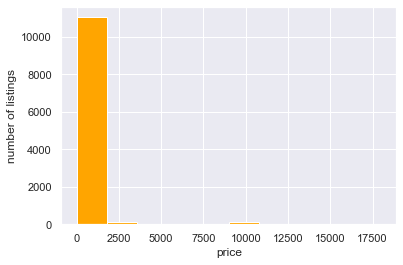

In [44]:
sns.set()
plt.hist(new_df['price'], color='orange')
plt.ylabel('number of listings')
plt.xlabel('price')

From the above histogram, the majority of listings are a priced under $2500. 

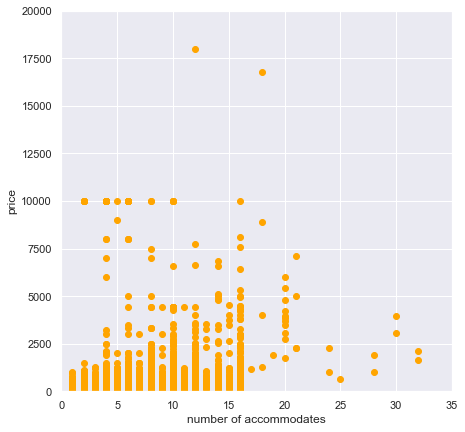

In [45]:
plt.figure(figsize=(7,7))
plt.xlim(0, 35)
plt.ylim(0, 20000)
plt.xlabel('number of accommodates')
plt.ylabel('price')
plt.scatter(new_df.accommodates, new_df.price, color='orange')

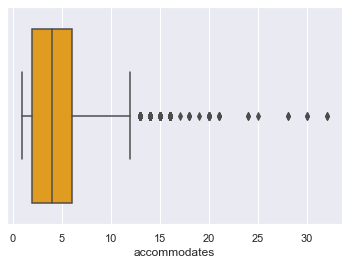

In [46]:
sns.boxplot(new_df['accommodates'], color='orange')

Text(0.5, 0, 'number of accommodates')

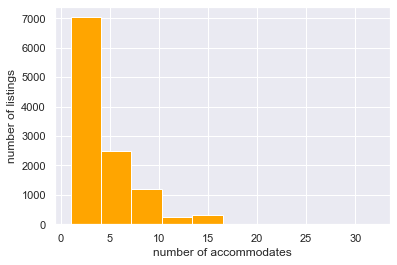

In [47]:
plt.hist(new_df['accommodates'], color='orange')
plt.ylabel('number of listings')
plt.xlabel('number of accommodates')

From the plots above, it looks like the outliers for acommodates are above 12.

Next I will analyze bathrooms.

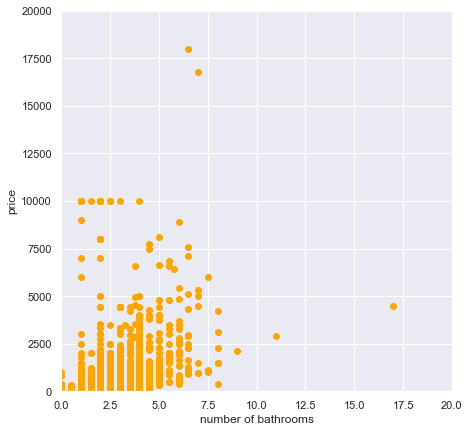

In [48]:
plt.figure(figsize=(7,7))
plt.xlim(0, 20)
plt.ylim(0, 20000)
plt.xlabel('number of bathrooms')
plt.ylabel('price')
plt.scatter(new_df.bathrooms, new_df.price, color='orange')

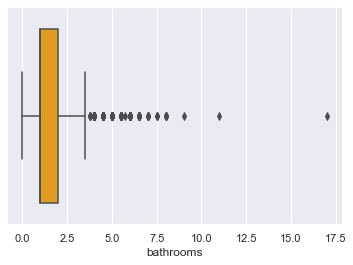

In [49]:
sns.boxplot(new_df['bathrooms'], color='orange')

Text(0.5, 0, 'number of bathrooms')

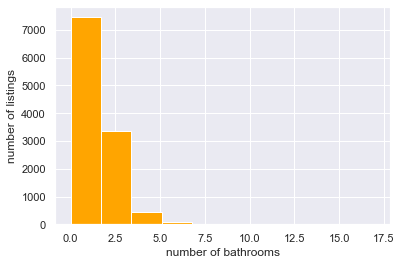

In [50]:
plt.hist(new_df['bathrooms'], color='orange')
plt.ylabel('number of listings')
plt.xlabel('number of bathrooms')

From the plots above, it looks like the outliers for bathrooms are above 4. 

Next I will analyze bedrooms.

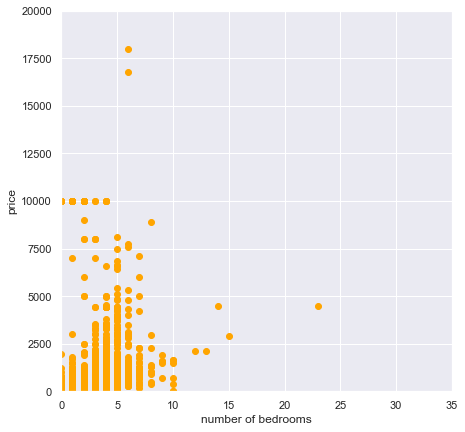

In [51]:
plt.figure(figsize=(7,7))
plt.xlim(0, 35)
plt.ylim(0, 20000)
plt.xlabel('number of bedrooms')
plt.ylabel('price')
plt.scatter(new_df.bedrooms, new_df.price, color='orange')

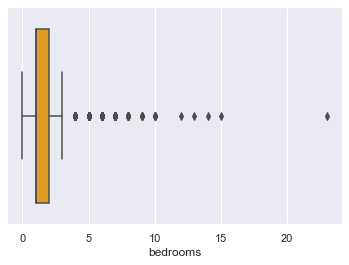

In [52]:
sns.boxplot(new_df['bedrooms'], color='orange')

Text(0.5, 0, 'number of bedrooms')

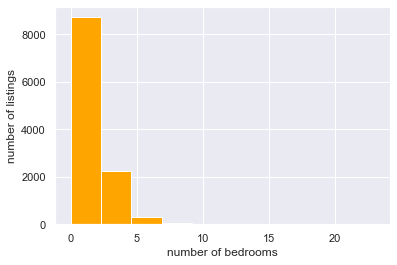

In [53]:
plt.hist(new_df['bedrooms'], color='orange')
plt.ylabel('number of listings')
plt.xlabel('number of bedrooms')

From the plots above, it looks like the outliers for bedrooms are above 4.

Next I will analyze beds.

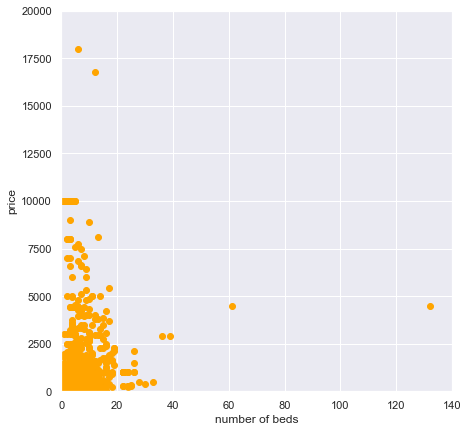

In [54]:
plt.figure(figsize=(7,7))
plt.xlim(0, 140)
plt.ylim(0, 20000)
plt.xlabel('number of beds')
plt.ylabel('price')
plt.scatter(new_df.beds, new_df.price, color='orange')

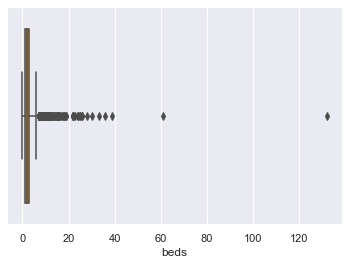

In [56]:
sns.boxplot(new_df['beds'], color='orange')

Text(0.5, 0, 'number of beds')

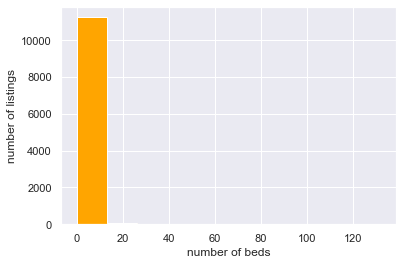

In [57]:
plt.hist(new_df['beds'], color='orange')
plt.ylabel('number of listings')
plt.xlabel('number of beds')

From the plots above, it looks like the outliers for beds are over 13. 

Next I will analyze bathroom to bedroom ratio.

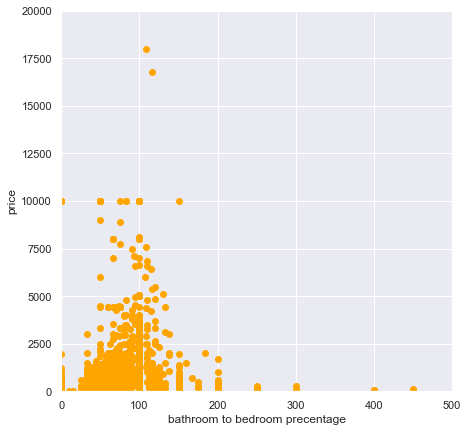

In [58]:
plt.figure(figsize=(7,7))
plt.xlim(0, 500)
plt.ylim(0, 20000)
plt.xlabel('bathroom to bedroom precentage')
plt.ylabel('price')
plt.scatter(new_df.bedroom_bath_ratio, new_df.price, color='orange')

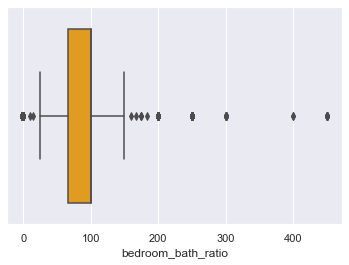

In [59]:
sns.boxplot(new_df['bedroom_bath_ratio'], color='orange')

Text(0.5, 0, 'bathroom to bedroom percentage')

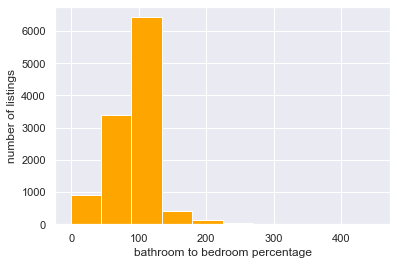

In [60]:
plt.hist(new_df['bedroom_bath_ratio'], color='orange')
plt.ylabel('number of listings')
plt.xlabel('bathroom to bedroom percentage')

From the plots above, it looks like most listings fall between a 1:2 or 1:1 bathroom to bedroom ratio. 

Next I will inspect records where price is less than the 1th percentile.

In [61]:
# Get subset of dataframe where price is less than 1th percentile and greater than 99th percentile
new_df[(new_df['price'] < new_df['price'].quantile(0.01))].sort_values(by='price')

,listing_id,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,number_of_bookings,bedroom_bath_ratio
233,377391,78704,30.23589,-97.76997,Entire home/apt,2,1.0,1.0,1.0,0.0,1,1,100.0,365.0,100.000000
5094,20320755,78704,30.25078,-97.77511,Entire home/apt,6,1.0,2.0,3.0,0.0,2,6,97.0,18.0,50.000000
5182,20541331,78704,30.24890,-97.75526,Private room,2,1.0,1.0,1.0,0.0,3,2,100.0,365.0,100.000000
5808,21838615,78721,30.25990,-97.68495,Entire home/apt,8,2.0,3.0,4.0,0.0,5,5,100.0,362.0,66.666667
5679,21378172,78704,30.25472,-97.77659,Entire home/apt,10,2.0,4.0,8.0,0.0,3,12,100.0,300.0,50.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6972,24991341,78744,30.15835,-97.78215,Private room,2,1.0,1.0,1.0,22.0,2,70,99.0,196.0,100.000000
3000,11492422,78721,30.26732,-97.69239,Private room,2,1.0,1.0,1.0,22.0,7,3,100.0,365.0,100.000000
2822,11133965,78748,30.17534,-97.82180,Private room,1,1.0,1.0,1.0,22.0,31,3,100.0,73.0,100.000000
4953,19747866,78758,30.36269,-97.71050,Private room,2,1.0,0.0,1.0,22.0,1,43,88.0,302.0,-1.000000


There are several listings with a price of \$0. Perhaps this was the price at the time the data scraping occurred and the host changed it soon after (maybe these were new listings). I don't trust these prices so I will remove the 6 records altogether.

In [62]:
# Get subset of data where price is more than 0
new_df = new_df[new_df['price'] > 0]

In [63]:
# Check that the statistics reflects the recent updates of trimming
new_df[['accommodates', 'bathrooms', 'bedrooms', 'beds', 
        'price']].describe(percentiles=[.01, .1, .25, .5, .75, .9, .99])

,accommodates,bathrooms,bedrooms,beds,price
count,11333.000000,11333.000000,11333.000000,11333.000000,11333.000000
mean,4.710580,1.550185,1.787258,2.556428,390.907968
std,3.258954,0.892380,1.268425,2.788003,1129.091623
min,1.000000,0.000000,0.000000,0.000000,1.000000
1%,1.000000,1.000000,0.000000,1.000000,23.000000
10%,2.000000,1.000000,1.000000,1.000000,50.000000
25%,2.000000,1.000000,1.000000,1.000000,80.000000
50%,4.000000,1.000000,1.000000,2.000000,145.000000
75%,6.000000,2.000000,2.000000,3.000000,300.000000
90%,8.000000,2.500000,3.000000,5.000000,669.000000


In [64]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11333 entries, 0 to 11338
Data columns (total 15 columns):
listing_id                11333 non-null int64
neighbourhood_cleansed    11333 non-null int64
latitude                  11333 non-null float64
longitude                 11333 non-null float64
room_type                 11333 non-null category
accommodates              11333 non-null int64
bathrooms                 11333 non-null float64
bedrooms                  11333 non-null float64
beds                      11333 non-null float64
price                     11333 non-null float64
minimum_nights            11333 non-null int64
number_of_reviews         11333 non-null int64
review_scores_rating      11333 non-null float64
number_of_bookings        11333 non-null float64
bedroom_bath_ratio        11333 non-null float64
dtypes: category(1), float64(9), int64(5)
memory usage: 1.3 MB


<b>I will save the cleaned file for easy access. Next step in the process is Exploratory Data Analysis.</b> 

In [65]:
new_df.to_csv('Data/airbnb_clean.csv', index=False)